# Lab 6 BF550 Fall 2022

Today, we will use your new understanding of probability distributions to generate data and then learn more about plotting aesthetics.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps
from scipy.stats import poisson

# 1. The shape of the Poisson distribution

Here is the probability mass function for the Poisson distribution,

$$f(k;\lambda)=P(X=k)=\frac{\lambda ^k \exp(-\lambda)}{k!}$$

Which describes the probability of the number of occurences, $k$, given an average number of events, $\lambda$. $\lambda$ can be computed given an average rate $p$ (units of occurences/population size) and population size $n$, $\lambda=np$ (units: occurences = occurences/size * size).


Task: On one figure
1. Plot the PMF of the Poisson distribution for $\lambda\in\{1,5\}$ for $k \in\{0, 15\}$.<br>
  a. Color each PMF by it's $\lambda$ (Hint: matplotlib will automatically choose a new color for each line if multiple lines are plotted on the same `figure` one after another.)<br>
  b. Show circle markers on each line<br>
  c. Make the lines a bit thicker. 
2. Create a legend with a title (check out the `label` parameter in `plt.plot()`)
3. Label the axes
4. Make the figure bigger (like 8 by 6 for example).

*Complete each of these tasks one at a time. Be sure you are getting what you expect before adding more complexity.*

Here, we are effectively remaking the plot from the [Poisson Wikipedia page](https://en.wikipedia.org/wiki/Poisson_distribution).

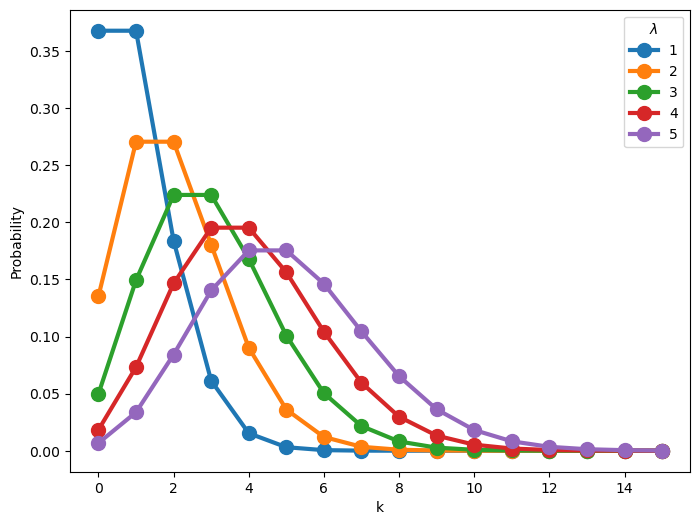

In [28]:
"Poisson distribution of a range of k"

lambdas = range(1, 6)
k = range(0, 16)
plt.figure(figsize=(8,6)) #tell the plt the figure size before it is
for i in lambdas:
    pmf=poisson.pmf(k,i)
    plt.plot(k,pmf, marker='o',label=i,lw=3,markersize=10)

plt.legend(title='$\lambda$')
plt.xlabel('k')
plt.ylabel('Probability')
plt.show()

# 2. Generate count data

Dunkin' is trying to evaluate whether it's worth it to keep it's stores open between 3-4am. To do this, they will collect data (aka, you will generate data 😉) over 15 days on how many people enter 6 different stores between 3-4am. The stores are from two different states and in each state there are three location types (rural, suburban, and urban). While the Dunkin' execs don't know this (yet), the average rate of Dunkin' attendance between 3-4am nationwide is 0.0002 vists/population size. The population sizes of the different locations are:

| Location | State |Population size |
| --- | --- |---|
| Rural| 0 | 5000 |
| Rural |1 | 5500 |
| Suburb |0 |  15000 |
| Suburb| 1| 16000 |
| Urban| 0 | 50000 |
| Urban| 1 | 60000 |

Task:
1. Compute the average number of visits between 3-4am for each location.
1. Generate count data for the number of people that visit each of these 6 locations over 15 days of observation (rows=trials (or days), columns=locations, where each location is a location type in a state, ex. `rural_state0`, `rural_state1`, etc.)
2. Place that data in a Pandas dataframe and name each column in a meaningful way
3. Display the first five rows

In [29]:
sizes = [5000, 5500, 15000, 16000, 50000,60000]
for s in sizes:
    s * 0.0002

In [30]:
"Average number of visits"
#lambdas = p * n
#units: avg visits = vists/size * size
lambdas = 0.0002 * np.array([5000, 5500, 15000, 16000, 50000,60000])

In [31]:
"Generate data"
days = 15
# Sample from a distribution for all days and each lambda
#sps.possion.rvs(1,size=days)
counts= np.random.poisson(lambdas,size=(days,len(lambdas)))
counts

array([[ 0,  0,  9,  2,  8,  9],
       [ 1,  0,  4,  2,  5, 14],
       [ 0,  1,  4,  3,  9, 12],
       [ 2,  0,  4,  1, 12, 15],
       [ 2,  1,  7,  2, 11,  7],
       [ 3,  0,  4,  2,  9, 14],
       [ 0,  0,  2,  1, 14, 11],
       [ 2,  2,  2,  6, 10, 12],
       [ 0,  1,  3,  4,  8, 11],
       [ 1,  1,  1,  2, 10, 14],
       [ 1,  1,  3,  1, 11, 14],
       [ 2,  3,  0,  1, 12, 14],
       [ 2,  2,  2,  3, 12, 13],
       [ 1,  2,  4,  0, 10, 19],
       [ 1,  1,  2,  3,  5, 18]])

In [32]:
"Place in a DataFrame"
# Generate meaningful column names for each location
locations=[]
loc_types=['Rural', 'Suburban', 'Urban']
states=[0,1]
for t in loc_types:
    for s in states:
        locations += [f'{t}_state{s}']      
# Construct a wideform DataFrame
counts = pd.DataFrame(counts, columns=locations)
# Display the first 5 rows
counts.head()

,Rural_state0,Rural_state1,Suburban_state0,Suburban_state1,Urban_state0,Urban_state1
0,0,0,9,2,8,9
1,1,0,4,2,5,14
2,0,1,4,3,9,12
3,2,0,4,1,12,15
4,2,1,7,2,11,7


# 3. Prepare the data for categorical data visualization

In order for Dunkin' to make it's decision about store hours, they'll be interested in how many people are visiting stores between 3-4am, but also what factors might be influencing customer visits. In this analysis, for example, they may be interested in if location type (rural, suburban, or urban) plays a role or if the state that the store is in is playing a role. In order to investigate this, it will be helpful to visualize the data. 

Since we are working with categorical data here, let's use Seaborn! In order to use Seaborn on this data, we will want to transform the data so all of the data we want to rerference in a visualization has it's own column in a longform DataFrame.

Task: Transform `counts` so there's a column for `day`, `location` (ex. `rural_state0`), `location_type` (ex. `rural`), `state` (ex. `state0`), and `counts`.

In [26]:
stacked = counts.rename_axis(columns='location',index='days').stack().reset_index(name='counts')

In [38]:
"Transform data"
## WORK ON THIS IN PIECES. DO ONE STEP, THEN DISPLAY THE OUTPUT, THEN MOVE TO THE NEXT STEP TO MAKE SURE YOU'RE DOING EVERYTHING CORRECTLY
# Hint: We are going to longform, we can use `stack`. We probably want to rename our axes before stacking to have meaningful column names
stacked = counts.rename_axis(columns='location',index='days').stack().reset_index(name='counts')
# How can we get location and state from current columns?
stacked.head()

,days,location,counts
0,0,Rural_state0,0
1,0,Rural_state1,0
2,0,Suburban_state0,9
3,0,Suburban_state1,2
4,0,Urban_state0,8


In [61]:
# Extract info from 'location'
'rural_state0'.split('_')

['rural', 'state0']

In [62]:
ls= stacked.location.str.split('_',expand=True)
ls.head()

,0,1
0,Rural,state0
1,Rural,state1
2,Suburban,state0
3,Suburban,state1
4,Urban,state0


In [63]:
dict(enumerate(['location_type', 'state']))

{0: 'location_type', 1: 'state'}

In [66]:
ls=ls.rename(columns=dict(enumerate(['location_type', 'state'])))
ls.head()

,location_type,state
0,Rural,state0
1,Rural,state1
2,Suburban,state0
3,Suburban,state1
4,Urban,state0


In [68]:
# Add this info to `stacked`
stacked = stacked.join(ls)
stacked.head()

,days,location,counts,location_type,state
0,0,Rural_state0,0,Rural,state0
1,0,Rural_state1,0,Rural,state1
2,0,Suburban_state0,9,Suburban,state0
3,0,Suburban_state1,2,Suburban,state1
4,0,Urban_state0,8,Urban,state0


# 4. Visualize the distribution of counts by state and location type

Since we'd like to compare the effect of state and location type, let's make a plot that shows all of that information. (This question will require *lots* of Googling).

Task:
1. Make a boxplot of the counts by `state` and colored by `location_type`.
2. Create a new (meaningful) color palette so that the color suggests population size, ex. rural is light blue, suburb is a bit darker blue, urban is darkest blue. Check out seaborn's "Blues" color palette for inspiration.
2. On top of these boxes, plot a strip plot of the actual counts in black dots (be sure to read about the `dodge` parameter for this function)
3. Plot a red dashed line on top that shows the mean number of counts for all data.
5. Move the legend to the top right corner outside of the plot

*Again, do one task. Continuously build this plot checking that each step that you implement is doing what you think it's doing.*

In [ ]:
"Boxplot and stripplot"

palette = None
overall_mean = None

plt.show()

# Challenge: Working with real (microbiome) data

Here we will analyze data from a recent microbiome paper title [Context-dependent dynamics lead to the assembly of functionally distinct microbial communities](https://www.nature.com/articles/s41467-020-15169-0). In this study, microbial communities were sourced (gathered) from 10 different [pitcher plants](https://en.wikipedia.org/wiki/Pitcher_plant). Filtered and unfiltered components of each community was then grown in the lab on a synthetic cricket powder medium and then these lab grown communities were sequenced over time. These sequences were then used to generate a count table, `bittleston_ASV.tsv`, where each column is a sample (the composition of a community from a given source, filtered/unfiltered, from a certain timepoint), each row is a microbial species (technically, each row is an "amplicon sequence variant", but you can think of that as a species), and each cell is the number of sequencing reads associated with a given species in a given sample. The file `bittelston_md.csv` describes the source community, filtration status, and day of each sample.

Your ultimate goal will be to create a lineplot showing how the diversity of each lab grown community changes over time. A common measure of diversity is the "ecological richness" or a count of the number of organisms that is present in a given sample,
$$\text{Richness}(x)=\sum (x>0)$$

First, let's get an understanding of how this data is distributed.

**Task:** Load the ASV and metadata tables. Plot the distribution of the counts in first 3 samples on a y-log scale.

In [ ]:
"Load data"
# This file is 'tab delimited', so we must manually set the delimiter (default is ',')
asv = pd.read_csv('bittleston_ASV.tsv', delimiter='\t', index_col=0)
md = pd.read_csv('bittleston_md.csv', index_col=0)
asv.head()

,SRR9953690,SRR9953691,SRR9953692,SRR9953693,SRR9953694,SRR9953695,SRR9953696,SRR9953697,SRR9953698,SRR9953699,...,SRR9954110,SRR9954111,SRR9954112,SRR9954113,SRR9954114,SRR9954115,SRR9954116,SRR9954117,SRR9954118,SRR9954119
#OTU ID,,,,,,,,,,,,,,,,,,,,,
d007cee006889a1090c2d5bfb35a1953,1185.0,1589.0,2929.0,1154.0,501.0,7707.0,1228.0,1361.0,4047.0,2534.0,...,1390.0,4210.0,1189.0,3919.0,1029.0,3180.0,1721.0,3536.0,787.0,2347.0
38c27ceaed634984c1225a82648cf571,1605.0,1635.0,2951.0,736.0,347.0,5634.0,2558.0,0.0,4312.0,356.0,...,0.0,0.0,0.0,85.0,6.0,0.0,0.0,0.0,0.0,0.0
d32e579b3ae7b2aae8d5bf9f027c29af,0.0,0.0,0.0,0.0,0.0,44.0,0.0,413.0,31.0,510.0,...,748.0,455.0,1561.0,676.0,1464.0,654.0,1231.0,1048.0,662.0,443.0
ca8c1cfd11ff0a6977f6772630a85de3,0.0,0.0,1919.0,0.0,0.0,0.0,0.0,1818.0,0.0,3010.0,...,6629.0,5896.0,7783.0,5387.0,7526.0,4999.0,7667.0,5305.0,5287.0,3434.0
20b3df08cd5fac2be26a2928155bab69,0.0,0.0,3012.0,0.0,0.0,0.0,0.0,22.0,0.0,113.0,...,1291.0,122.0,1049.0,140.0,834.0,58.0,789.0,66.0,901.0,79.0


In [ ]:
"Plot the count distribution of the first three samples with a y log scale"

plt.show()

Notice how long the "tail" of this distribution is. The vast majority of the data is close 0 while there are a few larger values.

**Now,**
1. Compute the richness of each sample
2. Merge richness data with metadata
3. Create a lineplot of the richness over time. Color each source community separately and use a different linestyle for filtered/unfiltered.
4. Move the legend outside and make the figure bigger

*As always, look at the dataframes you are working with before performing any further operations.*

In [ ]:
"Compute richness"
richness = None

"Visualize richness timeseries"

plt.show()

**Task:** Does filtering the community affect the richness? Think of a data visualization to probe this question. Perform a paired statistical test(s) to investigate this question.